<a href="https://colab.research.google.com/github/ritzi12/notebooks_supervised/blob/main/eda_using_seaborn_missing_value_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA USING SEABORN , MISSING VALUE TECHNIQUES

This notebook attempts to carry out an exhaustive EDA with beginner friendly tutorial using SEABORN . This notebook is still in progress and further feature engineering , model building will be added to this eventually !
So let's hop on and explore the Spaceship Titanic Dataset!!

**Update : 8-May-2022**

Added Missing Value Handling Techniques Tutorial and calculated missing value for the dataset.


# DATA FIELD DESCRIPTION
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [4]:
import pandas as pd
import numpy as np

import os
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [5]:
DATAPATH = '../content/'


train_df = pd.read_csv(os.path.join(DATAPATH,'train.csv'))

In [6]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Quick EDA

A quick eda can be carried out using pandas, we can observe the following -


> * **Transported** - Almost half or majority of the passengers are transported to another dimensions i.e. value True <br>
* **HomePlanet** -  The passengers come from 3 unique homeplanets. Majority of them come from *Earth* 😇
* **CryoSleep** - Almost 60% of passengers prefer to travel without cryosleep . Note passengers who are in cryosleep are confined to cabins.
* **Destination** - 3 unique destinations and 70% are travelling to *TRAPPIST-1e*	 planet :)
* **Age** - Mean age of passengers 29 and median age 27 . Slightly right skewed. Highest age being 79 and min age is 0 . 25% of pasenngers age below 19 .
* **VIP** - 95% of passengers are non-VIP .
* **Services** -  Out of all services average amount spend is highest for Food Court. Since food being a necessity .




In [7]:
train_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


# DETAILED EDA

* We can see only 6 columns out of 14 are numeric majority of them categorical.

# Missing Values Count

In [8]:
# % of Missing Values in each column
print('% of Missing Values for each Columns')
print('======================================')
train_df.apply(lambda x :(x.isnull().mean())*100)

% of Missing Values for each Columns


PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [9]:
# if we drop all na amount of data loss

print('Amount of data loss on dropping on all Na ~25%\n',1-(train_df.dropna().shape[0]/train_df.shape[0]))


Amount of data loss on dropping on all Na ~25%
 0.24007822385827682


# Adding Columns / Splitting Columns

Based on Data field description we can split the column `PassengerId` and `Cabin`  to derive further feature columns for analysis.

* `PassengerId` split into :
  * `Group_Num`
  * `Group_Id`

* `Cabin` split into:
  * `deck`
  * `num`
  * `side`


In [10]:
#Splitting Columns
train_df[['GroupNum','Group_Id']] =train_df['PassengerId'].str.split('_', expand=True)

train_df[['deck','num','side']] = train_df['Cabin'].str.split('/', expand=True)

**Combining Columns**

Adding columns of Luxury Services to create a new column in dataframe as `TotalBill`

**NOTE** : NA columns are considered as 0 while summing

In [11]:
train_df['TotalBill'] =  train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  GroupNum      8693 non-null   object 
 15  Group_Id      8693 non-null   object 
 16  deck          8494 non-null   object 
 17  num           8494 non-null   object 
 18  side          8494 non-null 

# Univariate Analysis


* AGE - We see a high count of age near 0 bin followed by a dip and then another rise.
* TOTALBILL - Majority 50% of total bill near 0,median slightly above 0 . Lot of outliers present
* DECK - deck F,G having majority of passengers, deck T and A having minimum.
* SIDE - Almost equal number of passengers for both sides.


#### Numeric


In [13]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalBill
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1440.866329
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,716.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1441.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


**HISTOGRAMS - AGE**



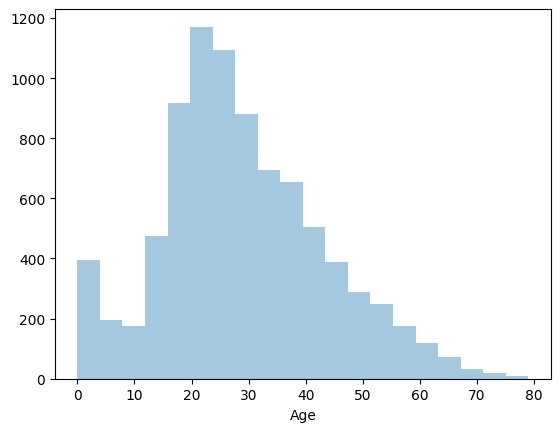

In [14]:
sns.distplot(train_df['Age'], kde=False, bins=20, hist=True) #bydefault hist,kde is true
plt.show()

**RUG PLOT**

A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis. It is used to visualise the distribution of the data. As such it is analogous to a histogram with zero-width bins, or a one-dimensional scatter plot.

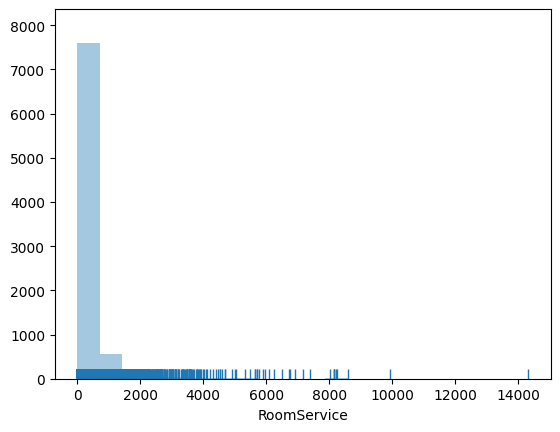

In [15]:
sns.distplot(train_df['RoomService'], kde=False, bins=20 , rug=True, )
plt.show()

**BOXPLOT**

<Axes: ylabel='TotalBill'>

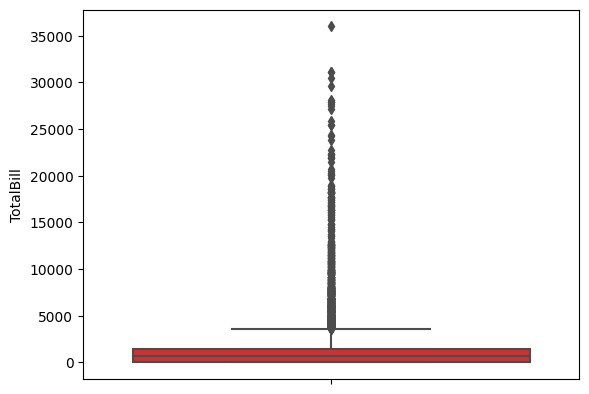

In [16]:
sns.boxplot(y=train_df.TotalBill , palette='Paired_r' )

Most of the amenities will have 75% of data in 0 so not plotting their histograms.

#### Categorical

https://www.geeksforgeeks.org/how-to-create-different-subplot-sizes-in-matplotlib/


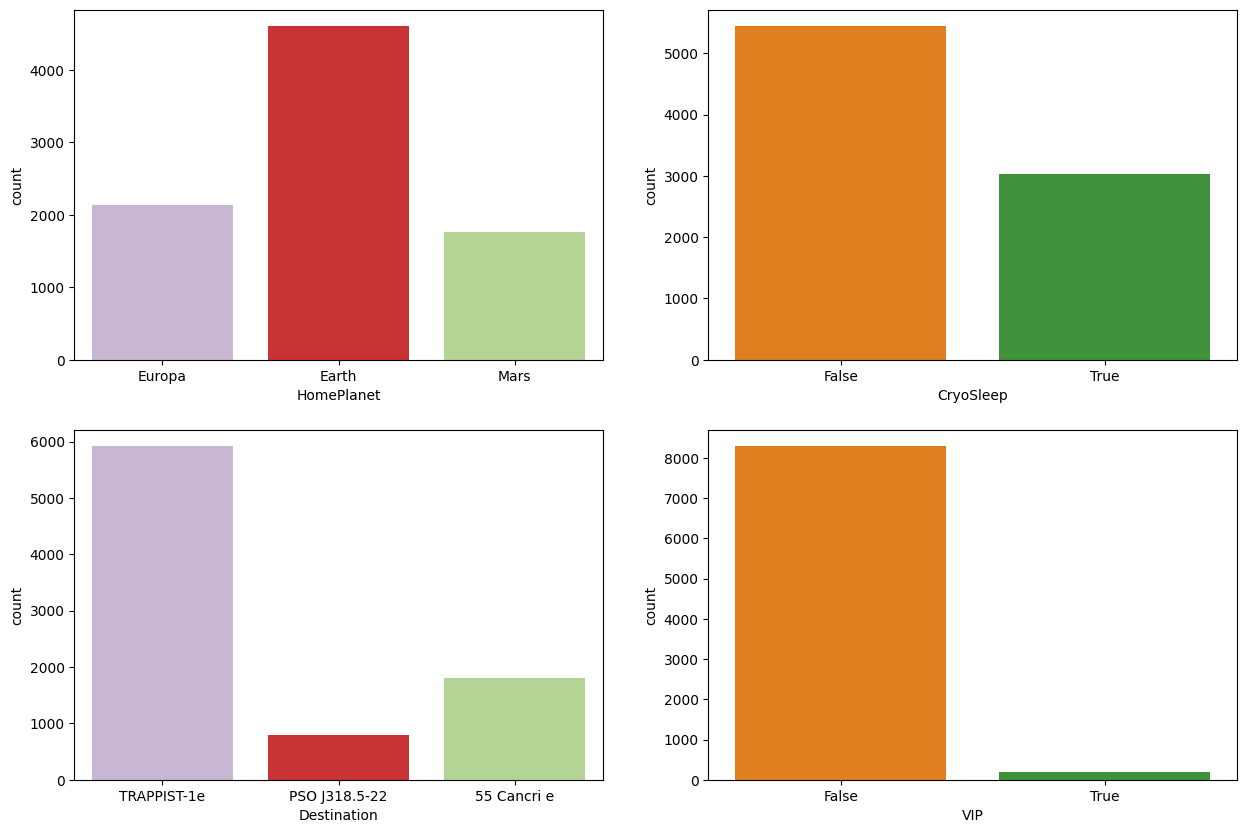

In [23]:
from matplotlib import figure
fig,ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(x=train_df['HomePlanet'] , palette='Paired_r', ax=ax[0][0])
sns.countplot(x=train_df['CryoSleep'] , palette='Paired_r', ax=ax[0][1])
sns.countplot(x=train_df['Destination'] , palette='Paired_r', ax=ax[1][0])
sns.countplot(x=train_df['VIP'] , palette='Paired_r', ax=ax[1][1])
plt.show()

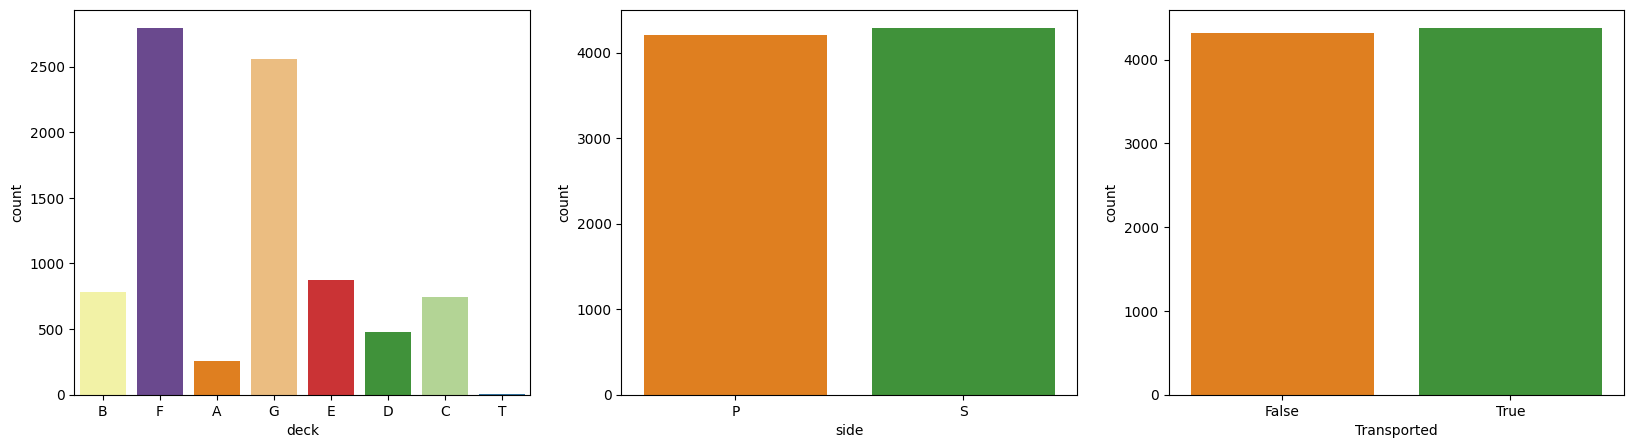

In [25]:
from matplotlib import figure
fig,ax = plt.subplots(1,3, figsize=(20,5))
sns.countplot(x=train_df['deck'] , palette='Paired_r', ax=ax[0])
sns.countplot(x=train_df['side'] , palette='Paired_r', ax=ax[1])
sns.countplot(x=train_df['Transported'] , palette='Paired_r', ax=ax[2])
plt.show()

# Bivariate Analysis

We now go through analysing relationship between 2 variables.

* AGE vs Transported  - age in 0-10 have higher number of transported passengers as compared to non-transported.
* TotalBill vs AGE - Passengers with age less than 13 years have 0 total bill.
* HomePlanet vs Transported - Passengers from "Europa" planet has highest prob of getting transported ~0.7
* CryoSleep vs Transported - Passengers in Cryosleep i.e. True have 0.8 prob of getting transported.
* Destination vs Transported - Cancrei 55 e has 0.6 prob highest followed by others at 0.5 .
* Deck vs Transported  - Deck B, C passengers have highest prob ~0.7 of getting transported.
* VIP vs Transported  - Non- VIP passengers have higher prob of getting transported >0.5.
* Side vs Transported - 's' side passengers have higher prob of getting transported >0.5

* TotalBill vs VIP - On an average VIP passengers have higher bill amount

* TotalBill vs Deck - ODeck B and C having high bill amounts as compared to other decks
* Cryosleep vs Deck - The prob of being put on cryosleep is high for deck B and G and if we recall prob of crysleep being transported is high and same can be observed when we see deck wise prob of being transported we see Deck B,C ,g having high prob so a connection between deck, cryosleep and transported there.

**HISTPLOT WITH HUE**

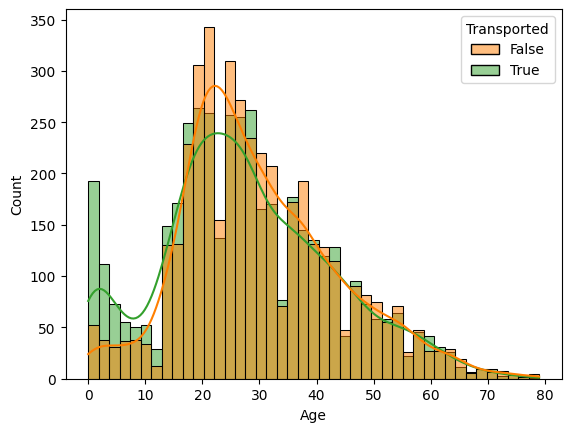

In [26]:
sns.histplot(x=train_df.Age , hue=train_df.Transported, palette='Paired_r',kde=True)
plt.show()

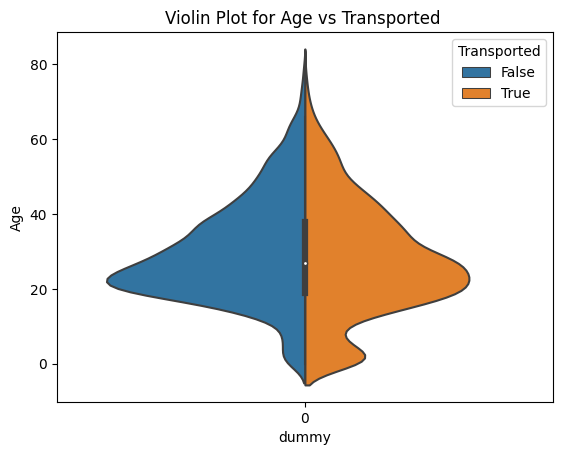

In [27]:
train_df['dummy'] = 0 #dummy variable is required when we want to plot hue without any x axis variable
                      #that is only two variable in plot instead of 3 (x,y,hue)
sns.violinplot(y='Age' ,x='dummy',hue ='Transported' , data = train_df,split=True).set_title('Violin Plot for Age vs Transported ')
plt.show()


**JOINTPLOT**

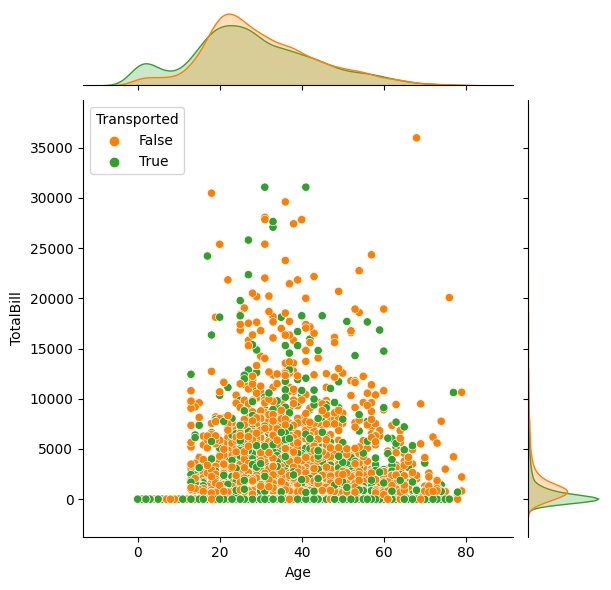

In [28]:
sns.jointplot(x=train_df.Age, y=train_df.TotalBill, palette='Paired_r', hue=train_df.Transported)

In [30]:
train_df[train_df.Age<13.0].TotalBill.sum() #Person with Age less than 13 have 0 total bills

0.0

**COUNTPLOT AND MEAN PROBABILITIES OF BEING TRANPORTED**

We now plot countplots and mean probabilities of being transported for each category. This helps us better understand which category class have higher probability of getting transported on an average basis.

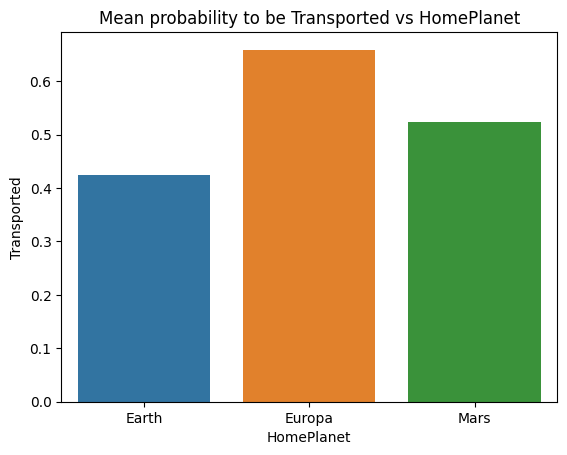

In [31]:
#PLottting mean prob for single feature 'HomePlanet'
notNull_df = train_df[(train_df.HomePlanet.isnull() == False) & (train_df.Transported.isnull() == False)][['HomePlanet','Transported']].reset_index()

temp = notNull_df.groupby('HomePlanet').mean()
sns.barplot(x=temp.index,y=temp.Transported).set_title('Mean probability to be Transported vs HomePlanet')
plt.show()

In [32]:
#Custom Function to plot Count of Categories wrt Target Column and Mean probability for each class in each category.
def plot_cat_prob(columnsList , data, ax_row, targetCol):
  sns.set_context("paper", font_scale=1.2)
  #initialise plot ax
  f,ax = plt.subplots(ax_row, 2, figsize=(18, 38))

  #iterate
  for r in range(ax_row):
    col_name = columnsList[r]
    sns.countplot(x=data[col_name], hue=train_df[targetCol], palette='RdPu',ax=ax[r][0])
    ax[r][0].set_title(f'Count of {col_name} wrt {targetCol}', fontsize=18)

    notNull_df = data[(data[col_name].isnull() == False) & (data[targetCol].isnull() == False)][[col_name,targetCol]].reset_index()
    temp = notNull_df.groupby(col_name).mean()

    sns.barplot(x=temp.index,y=temp[targetCol], ax=ax[r][1], palette='mako')
    ax[r][1].set_title(f'Mean probability to be {targetCol} vs {col_name}', fontsize=20)



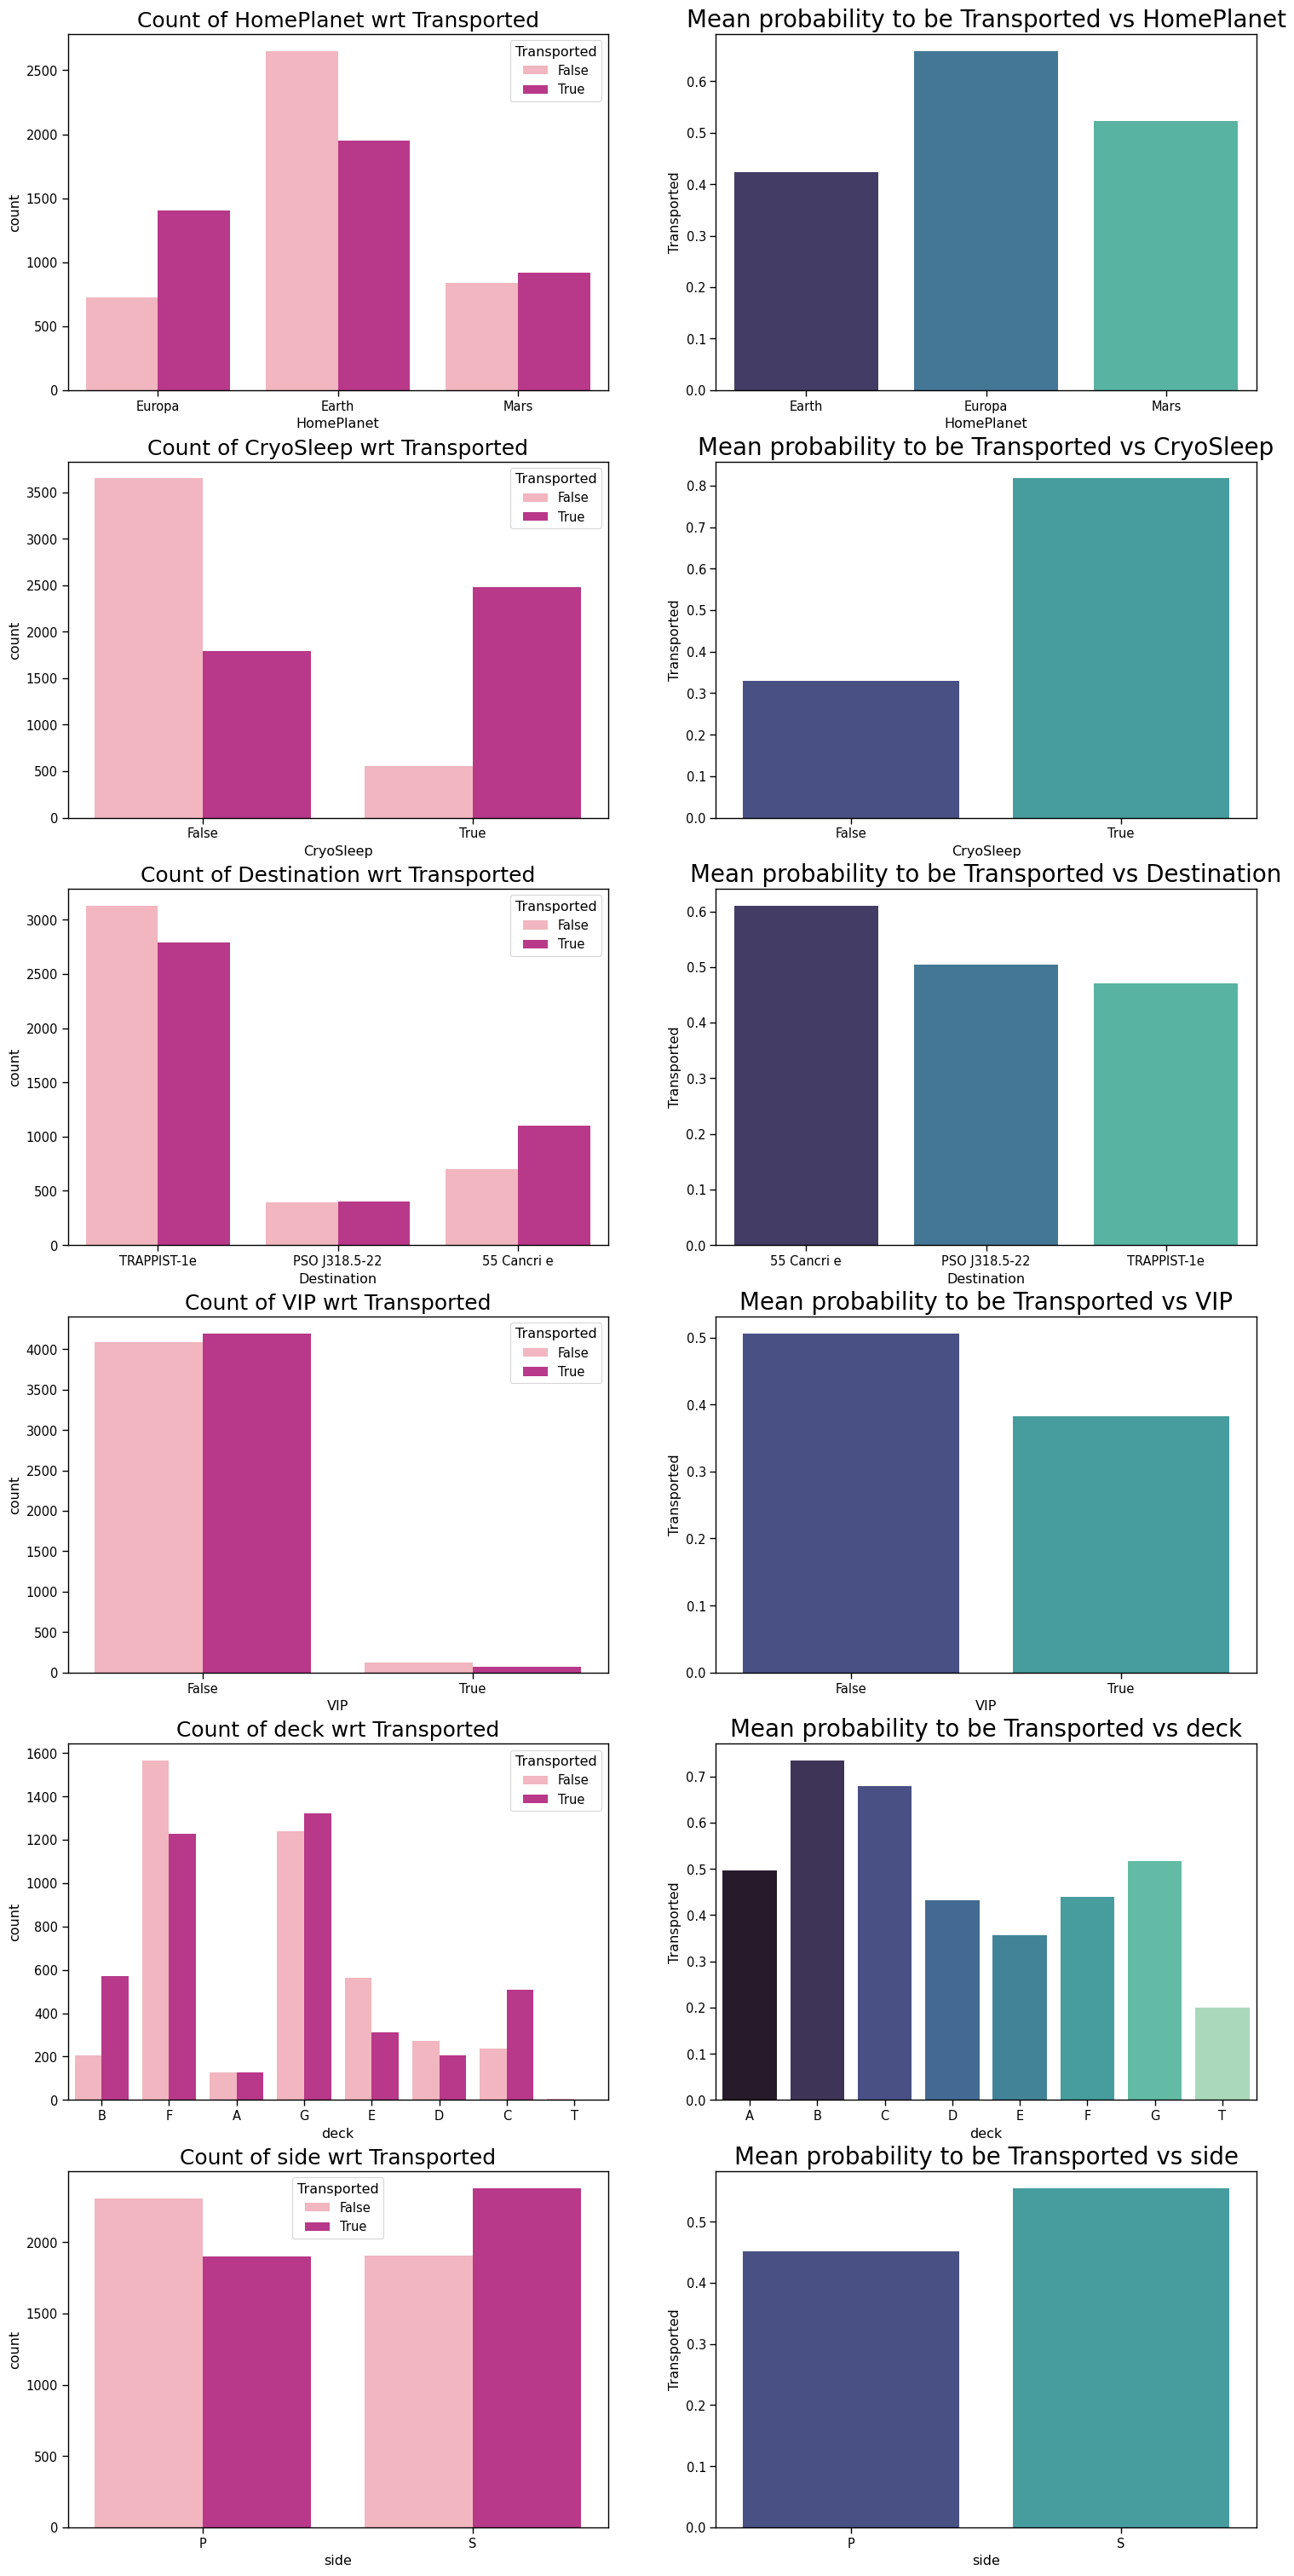

In [33]:
#Calling custom function to plot
plot_cat_prob(['HomePlanet','CryoSleep','Destination','VIP','deck','side'],train_df,6,targetCol='Transported')

**VIOLINPLOT -  Total Bill vs VIP**


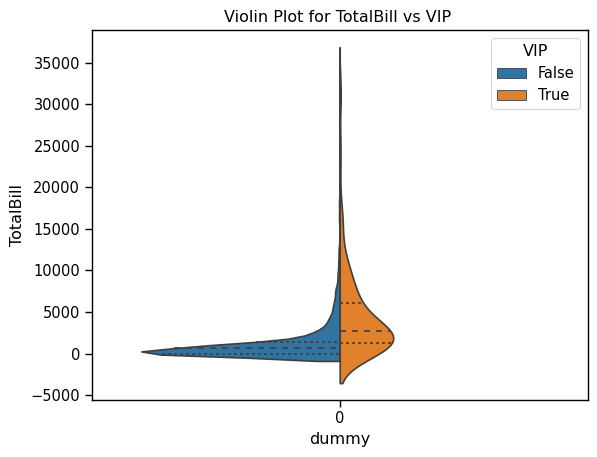

In [34]:
train_df['dummy'] = 0 #dummy variable is required when we want to plot hue without any x axis variable
                      #that is only two variable in plot instead of 3 (x,y,hue)
sns.violinplot(y='TotalBill' ,x='dummy',hue ='VIP' , data = train_df,split=True,inner='quartile').set_title('Violin Plot for TotalBill vs VIP ')
plt.show()


**STRIPPLOT - DECK VS Total Bill**


<Axes: title={'center': 'Violin Plot for Age vs Transported '}, xlabel='deck', ylabel='TotalBill'>

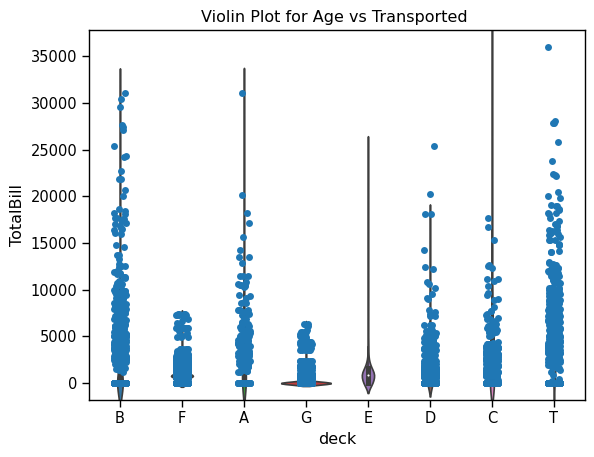

In [39]:
sns.violinplot(y='TotalBill' ,x='deck', data = train_df,split=True).set_title('Violin Plot for Age vs Transported ')
sns.stripplot(y='TotalBill', x='deck',data=train_df)

**FACTORPLOT(changed to CATPLOT) - CRYOSLEEP vs DECK**


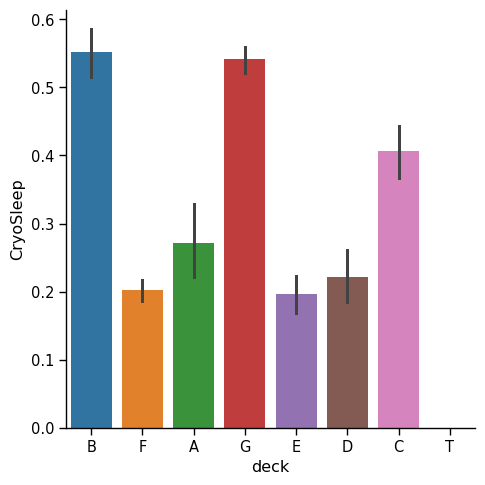

In [37]:
sns.catplot(y='CryoSleep', x='deck',data=train_df,kind='bar')

# Multivariate Analysis

**CORRELATION HEATMAP**

In [40]:
train_df.drop(columns=['dummy','PassengerId','Name','Cabin'],inplace=True)

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  GroupNum      8693 non-null   object 
 12  Group_Id      8693 non-null   object 
 13  deck          8494 non-null   object 
 14  num           8494 non-null   object 
 15  side          8494 non-null   object 
 16  TotalBill     8693 non-null   float64
dtypes: bool(1), float64(7), object(9)
memory usage: 1.1+ MB


In [42]:
#Custom Function to generate label encodings for object and bool columns
def make_label_encoder(data):

  cat_col = data.select_dtypes(['object','bool']).columns
  transformed_df = pd.DataFrame()

  for col in cat_col:
    le = LabelEncoder()
    x = le.fit_transform(data[col])
    transformed_df[col] = x

  numeric_col = data.drop(columns=cat_col)
  return pd.concat([transformed_df,numeric_col],axis=1)



In [43]:
#Transform dataset
train_df_transformed = make_label_encoder(train_df)

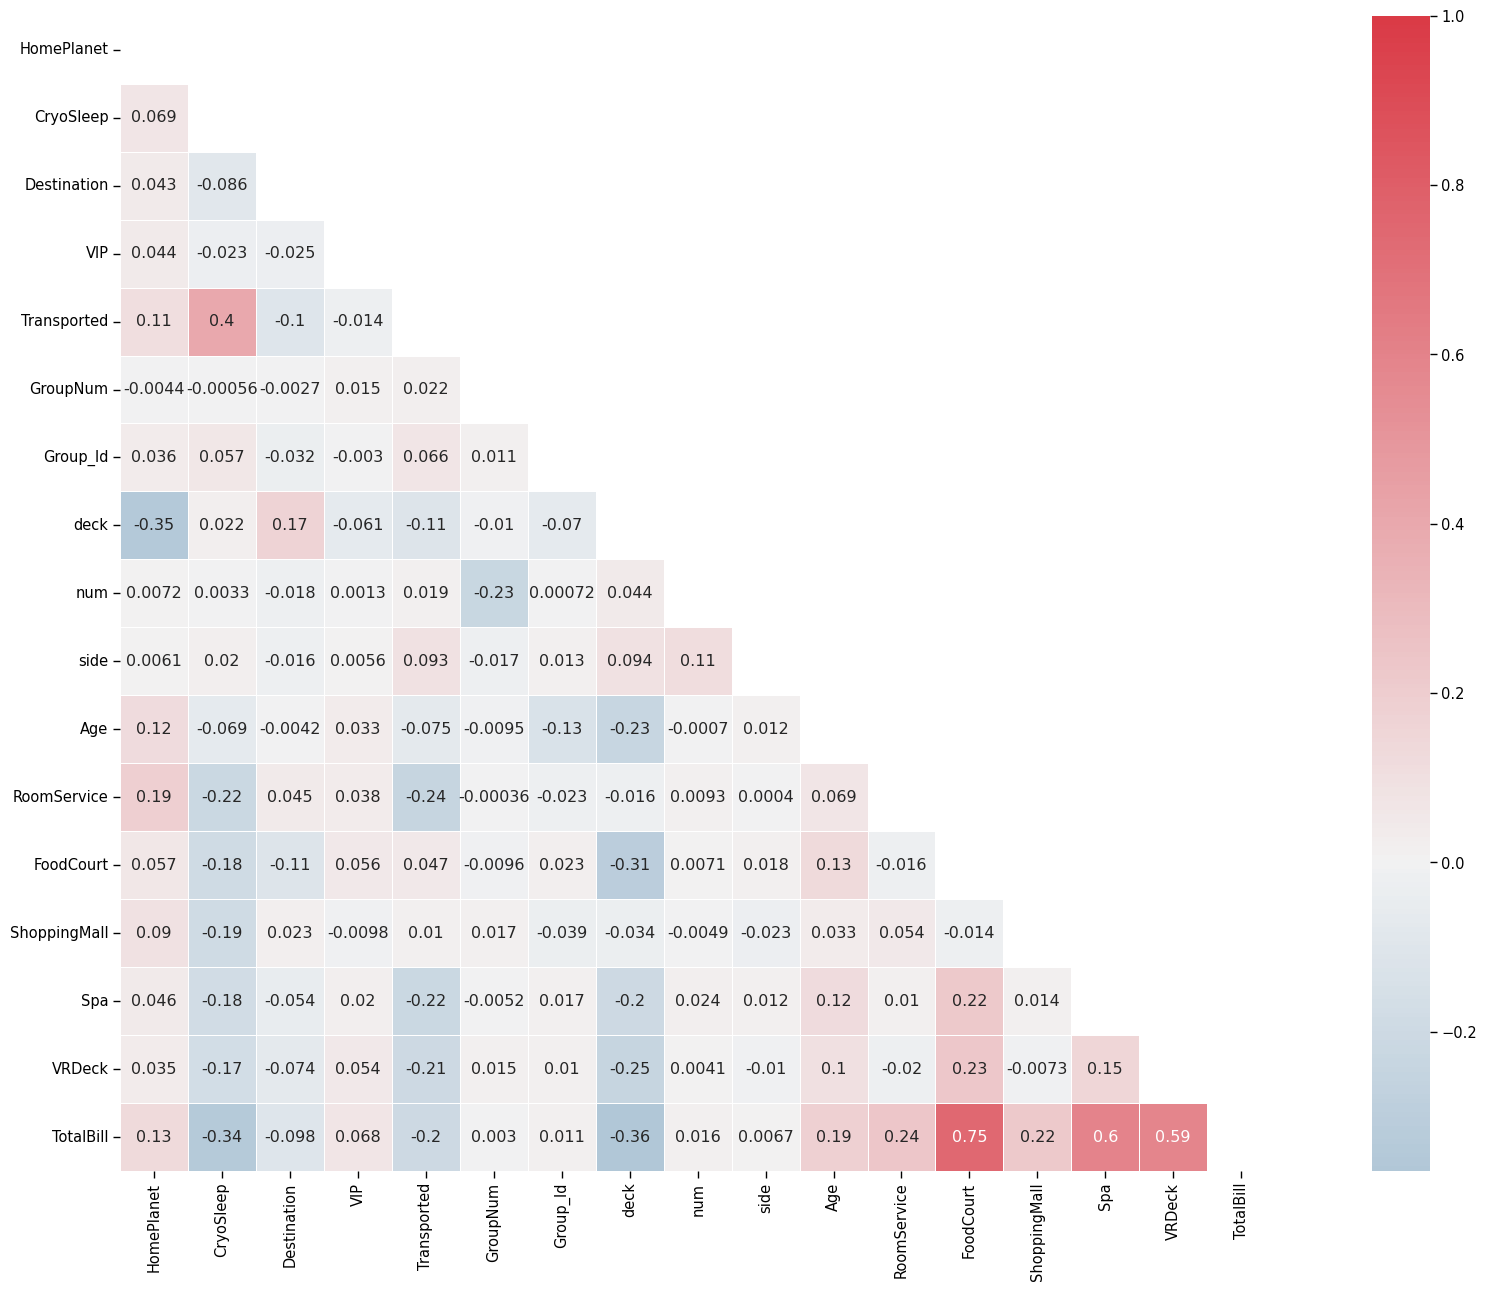

In [44]:
corr = train_df_transformed.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

# Missing Value Handling

Now we will focus on how we can handle missing values and various techniques available to handle missing value. We will quickly go through each of them and use the one which is appropriate for our dataset.

## **Types of Missing Values**
1. **Missing completely at random(MCAR)**

    All observations have the same likelihood of being missing.

    Examples

    •	Electronic time observations are missing, independent of what lane a swimmer is in.
    •	A scale is equally likely to produce missing values when placed on a soft surface or a hard surface ( Van Buren, 2018).
    •	Geographical location data is eqaully likely to be missing for all locations.
2. **Missing at random(MAR)**

    Likelihood that a data point is missing is not related to the missing data but may be related to other observed data.
    To determine if your data contains missing at random data, observe the conditional probabilities of different features. For example, if conditioning on another feature increases the likelihood of a particular value compared to a proportional distribution, this value is likely MAR.

    Example -
    •	A certain swimming lane is more likely to have missing electronic time observations.
    •	Childhood health assessment data is more likely to be missing in lower median income counties.

3. **Missing not at random(MNAR)**

    Likelihood of a missing observation is related to its values.•	It can be difficult to identify MNAR data because the values of missing data are unobserved. The distribution of the missing observations do not only depend on the observed values but also the unobserved values as well.

    Example -

    •	When surveyed people with more income are less likely to report their income.
    •	On a health survey illicit drug users are less likely to respond to a question about illicit drug use.



## Techniques to Tackle Missing Values

Broadly two techniques are there .

1. **Deletion**
    * Easy to implement
    * Less time consuming
    * Suitable for data having not more than 5~6% missing value
    * Suitable for MCAR

   **Limiations**
     * Can result in loss of information or bias


2. **Imputation**

    **Univariate vs Multivariate Imputation**

    One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).

   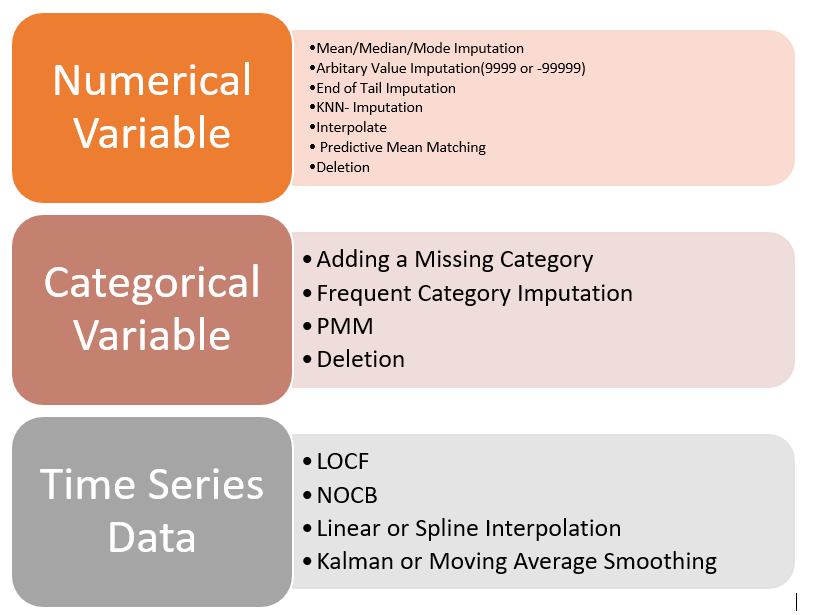

To know more about each of these techniques refer to:

https://www.aptech.com/blog/introduction-to-handling-missing-values/

https://www.analyticsvidhya.com/blog/2021/10/a-complete-guide-to-dealing-with-missing-values-in-python/

We shall now use the popular `sklearn.impute` library to impute our missing values since deletion is not an option for us as 25% of our is missing

In [45]:
from sklearn.impute import SimpleImputer


dict_imp = {} # dictionary to store imputers for later on use in test data

#Custom function for simple Imputer
def imputer_func(col, data, strategy='mean'):
    imp = SimpleImputer(strategy= strategy)
    data[col] = imp.fit_transform(data[[col]])
    dict_imp[col] = imp
    return data[col]

In [46]:
#Impute Data

train_df['HomePlanet'] = imputer_func('HomePlanet',train_df,strategy = 'most_frequent')
train_df['CryoSleep'] = imputer_func('CryoSleep',train_df,strategy = 'most_frequent')
train_df['Destination'] = imputer_func('Destination',train_df,strategy = 'most_frequent')
train_df['Age'] = imputer_func('Age',train_df,strategy = 'mean')
train_df['VIP'] = imputer_func('VIP',train_df,strategy = 'most_frequent')
train_df['RoomService'] = imputer_func('RoomService',train_df,strategy = 'median')
train_df['FoodCourt'] = imputer_func('FoodCourt',train_df,strategy = 'median')
train_df['ShoppingMall'] = imputer_func('ShoppingMall',train_df,strategy = 'median')
train_df['Spa'] = imputer_func('Spa',train_df,strategy = 'median')
train_df['VRDeck'] = imputer_func('VRDeck',train_df,strategy = 'median')
train_df['deck'] = imputer_func('deck',train_df,strategy = 'most_frequent')
train_df['num'] = imputer_func('num',train_df,strategy = 'most_frequent')
train_df['side'] = imputer_func('side',train_df,strategy = 'most_frequent')

In [47]:
train_df.isnull().sum() #check for missing values

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
GroupNum        0
Group_Id        0
deck            0
num             0
side            0
TotalBill       0
dtype: int64

# Feature Selection

Some Features are nothing but extensions of the other essential features. These redundant features do not effectively contribute to the model training as well.
> The objective of variable selection is three-fold: improving the prediction performance of the predictors, providing faster and more cost-effective predictors, and providing a better understanding of the underlying process that generated the data.

The different types of general feature selection methods - **Filter methods, Wrapper methods, and Embedded methods**

## When to do feature selection?
Usually it is said feature selection should be done after train test split. Since there can be information leakage, if done before, from the Test-Set.

For details refer  -  https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after


**1. FILTER METHOD**

    Filter methods are generally used as a data preprocessing step. The selection of features is independent of any machine learning algorithm. Features give rank on the basis of statistical scores which tend to determine the features' correlation with the outcome variable. requires less computational time.
>     Ex - information gain, chi-square test, fisher score, correlation coefficient, variance threshold

**2. WRAPPER METHOD**

    A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This method searches for a feature which is best-suited for the machine learning algorithm and aims to improve the mining performance. To evaluate the features, the predictive accuracy used for classification tasks and goodness of cluster is evaluated using clustering

    •	Forward Selection: The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

    •	Backward Elimination: The procedure starts with the full set of attributes. At each step, it removes the worst attribute remaining in the set.

    •	Combination of forward selection and backward elimination: The stepwise forward selection and backward elimination methods can be combined so that, at each step, the procedure selects the best attribute and removes the worst from among the remaining attributes.

    •	Recursive Feature elimination: Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.


**3. EMBEDDED METHOD**

    Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
    This is why Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).
      **Examples of regularization algorithms are the LASSO, Elastic Net, Ridge Regression, etc., Trees - Random Forest Importance**


Let us now try out various methods to see which is suitable for our dataset we can use combination of above approaches too. We are performing feature selection before splitting since we have limited data. But it is advisable to do it after splitting of dataset .

# UNIVARIATE FEATURE SELECTION - Filter Method

## Variance Threshold

Below we check which columns are having a variance less than 0.2 those columns are dropped since there is not much variation in data and doesn't contribute towards prediction.

* As we can see from output of `get_support` of imputer. `VIP` column of dataset is having less than 20% variance and dropped by imputer.

In [48]:
from sklearn.feature_selection import VarianceThreshold

X = train_df.drop(columns=['Transported'],axis=1)
X_encoded = make_label_encoder(X)
Y = train_df[['Transported']]
Y_encoded = make_label_encoder(Y)

impute_var =  VarianceThreshold(threshold=0.2)
impute_var.fit_transform(X_encoded)
X_encoded.columns[impute_var.get_support()]

Index(['HomePlanet', 'CryoSleep', 'Destination', 'GroupNum', 'Group_Id',
       'deck', 'num', 'side', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'TotalBill'],
      dtype='object')

## SelectKBest

In [49]:
from sklearn.feature_selection import SelectKBest,chi2, f_classif, mutual_info_classif
# chi2
impute_selectK = SelectKBest(chi2, k=5)
impute_selectK.fit_transform(X_encoded,Y_encoded)
X_encoded.columns[impute_selectK.get_support()]

Index(['RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'TotalBill'], dtype='object')

In [50]:
#f_classif
impute_selectK = SelectKBest(f_classif, k=5)
impute_selectK.fit_transform(X_encoded,Y_encoded)
X_encoded.columns[impute_selectK.get_support()]

Index(['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'TotalBill'], dtype='object')

In [51]:
#mutual_info_classif
impute_selectK = SelectKBest(mutual_info_classif, k=5)
impute_selectK.fit_transform(X_encoded,Y_encoded)
X_encoded.columns[impute_selectK.get_support()]

Index(['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'TotalBill'], dtype='object')

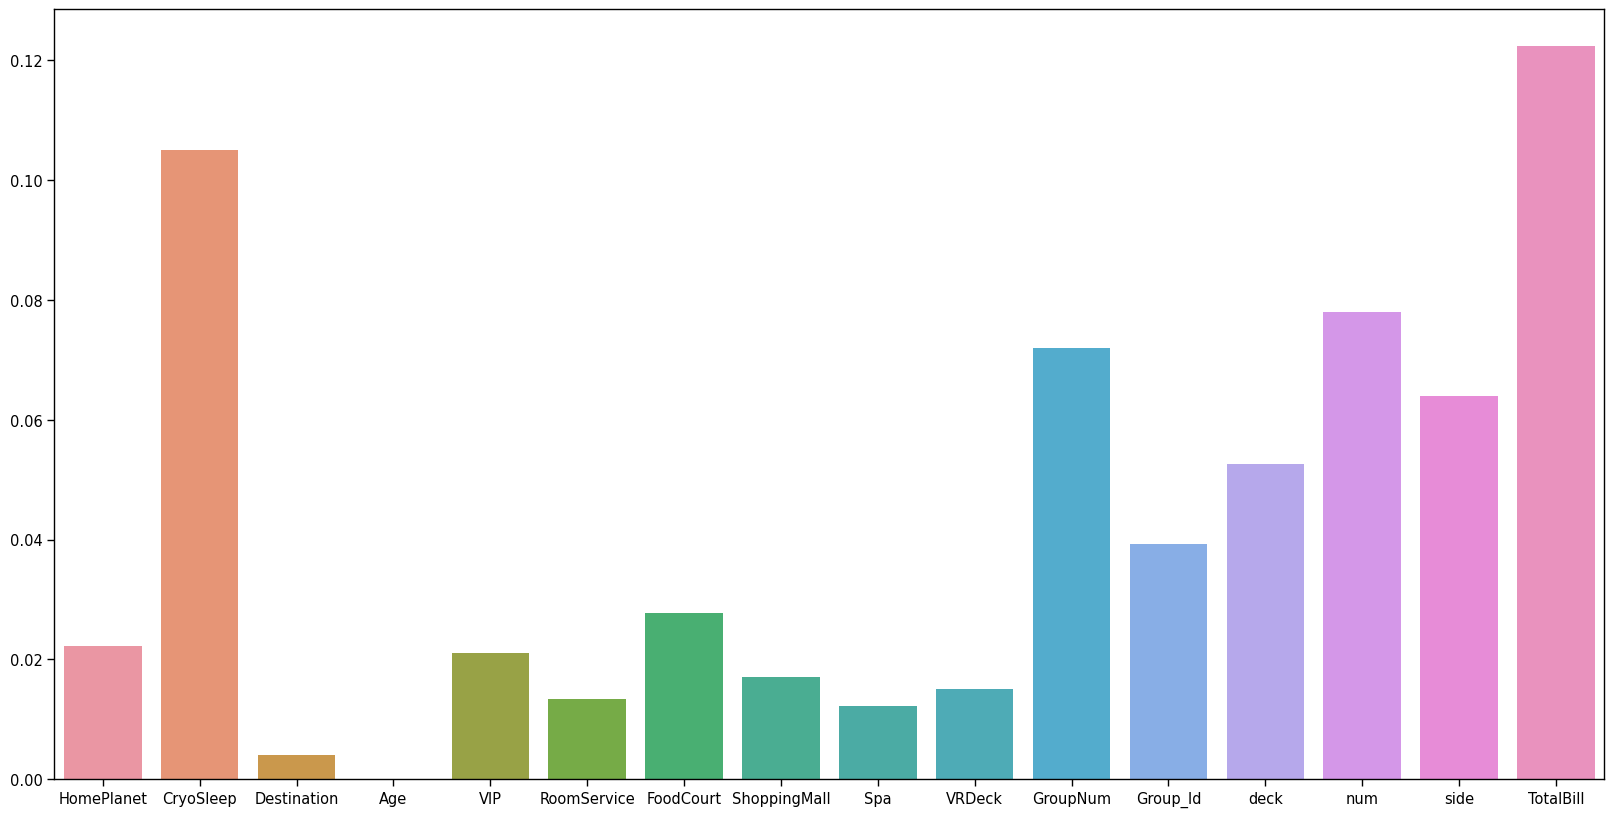

In [52]:
#Lets plot the mutual information gain for each feature
mi = mutual_info_classif(X_encoded,Y_encoded)
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=X.columns , y=mi)
plt.show()

We can see there is a discrepancy between SelectKbest and Mutual Info gain we received sepeately . This needs to be investigated as why both results varying ?

# Wrapper Methods

In [53]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(random_state =1200)
estimator.fit(X_encoded,Y_encoded)
selector = RFECV(estimator,cv= 5, step=1,scoring='accuracy')
selector.fit(X_encoded,Y_encoded)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=1200),
      scoring='accuracy')

In [54]:
print(X.columns[selector.get_support()])
print('Optimal Number of features selected by RFECV = ', selector.n_features_)

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupNum', 'Group_Id',
       'deck', 'num', 'side', 'TotalBill'],
      dtype='object')
Optimal Number of features selected by RFECV =  15


The RFECV used cross validation to find the optimal number of parameters for our dataset and it zeroed in on 15 but we can drop off the luxury service n just include TotalBill as a single feature representing them.

# > **THANK YOU!!**